# Homework 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt

1. Compute the Gradient of L explicitly.

In [4]:
# One-dimensional function
theta_0 = 1.0

def l(theta):
    return (theta -3)**2 + 1

def grad_l(theta):
    return 2*(theta -3)

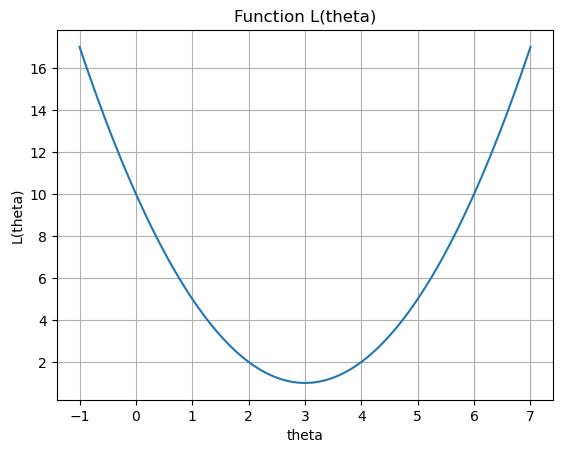

In [5]:
# Draw L(theta)
theta_vals = np.linspace(-1, 7, 100)
L_vals = l(theta_vals)
plt.plot(theta_vals, L_vals)
plt.xlabel('theta')
plt.ylabel('L(theta)')
plt.title('Function L(theta)')
plt.grid()
plt.show()

2. Implement the Gradient Descent to optimize 
 following what we introduced on the theoretical sections.

In [6]:
def GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta):
    loss_history = []
    theta_history = []

    # GD step
    for k in range(maxit):
        theta = theta_0 - eta * grad_l(theta_0)

        # viene fatta la norma per poter avere una misura scalare del vettore (o se theta fosse una matrice della matrice)
        # linalg.norm di base fa la norma 2 per i vettori e la norma di Frobenius per le matrici
        # controlliamo che la lunghezza del gradiente non sia troppo corta 
        # e che la differenza tra i parametri attuali e quelli precedenti non sia troppo piccola
        if(np.linalg.norm(grad_l(theta))<tolL or (np.linalg.norm(theta-theta_0)<tolTheta)):
            break

        loss_history.append(l(theta))
        theta_history.append(theta_0)

        theta_0 = theta
    return theta, k, loss_history, theta_history

In [7]:
maxit = 100
tolL = 1e-6
tolTheta = 1e-6
eta = 0.1

theta_opt, num_iter, _, _ = GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
print("Optimal theta:", theta_opt, " iterations:" , num_iter)
print("Optimal value of L:", l(theta_opt), " value of L at theta0:", l(theta_0))

Optimal theta: 2.9999961687611476  iterations: 58
Optimal value of L: 1.0000000000146785  value of L at theta0: 5.0


3-4. Test three different constant step sizes

In [8]:
etas = np.array([0.01, 0.2, 1.0])
loss_histories = []
theta_histories = []

for eta in etas:
    theta_0 = 1.0
    theta_opt, num_iter, loss_history, theta_history = GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
    loss_histories.append(loss_history)
    theta_histories.append(theta_history)
    print(f"Eta: {eta} => Optimal theta: {theta_opt}, iterations: {num_iter}, L(theta_opt): {l(theta_opt)}")


Eta: 0.01 => Optimal theta: 2.7347608882104932, iterations: 99, L(theta_opt): 1.0703517864228864
Eta: 0.2 => Optimal theta: 2.9999987718115575, iterations: 27, L(theta_opt): 1.0000000000015083
Eta: 1.0 => Optimal theta: 1.0, iterations: 99, L(theta_opt): 5.0


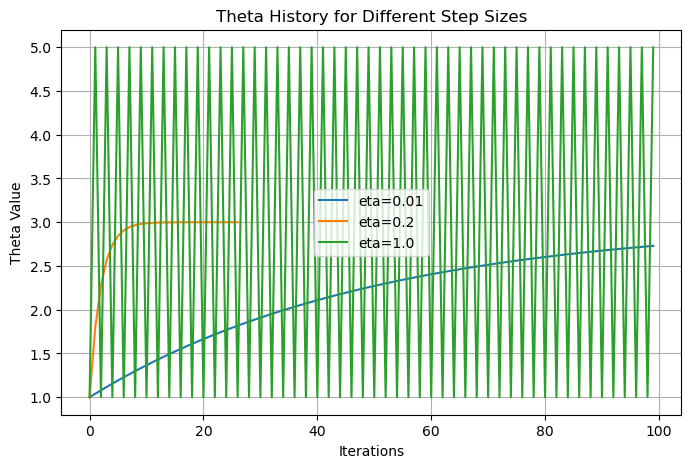

In [9]:
# Plotting theta histories for different etas on the same graph with the x axis as iterations
plt.figure(figsize=(8, 5))
for i, eta in enumerate(etas):
    plt.plot(theta_histories[i], label=f'eta={eta}')
plt.xlabel('Iterations')
plt.ylabel('Theta Value')
plt.title('Theta History for Different Step Sizes')
plt.legend()
plt.grid()
plt.show()

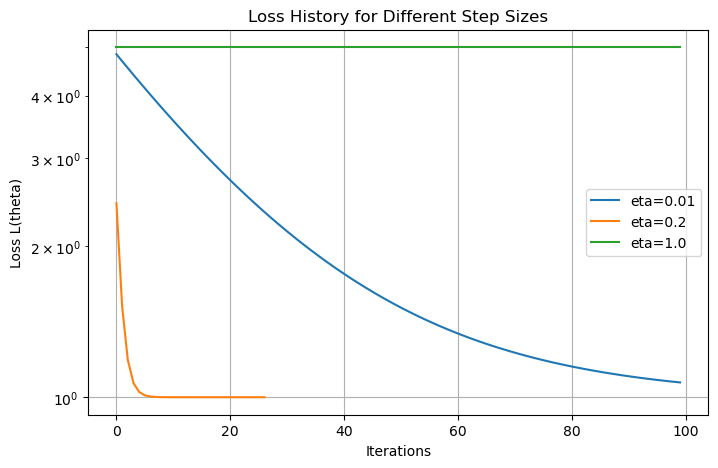

In [10]:
# Plotting the loss histories for different etas on the same graph with the x axis as iterations
plt.figure(figsize=(8, 5))
for i, eta in enumerate(etas):
    plt.plot(loss_histories[i], label=f'eta={eta}')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Loss L(theta)')
plt.title('Loss History for Different Step Sizes')
plt.legend()
plt.grid()
plt.show()

Relate your observations to the discussion in class about:

-step-size being too small / too large,
-the role of convexity,
-how the “just right” step size leads to fast convergence.

# Exercise 2: Backtracking Line Search

In [11]:
def l(theta):
    return theta**4 + 3*(theta**2) + 2

def grad_l(theta):
    return 4*(theta**3) + 6*theta

Implement Gradient Descent with Backtracking, using the Armijo condition, considering the backtracking(...) function from class.

In [12]:
def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    """
    Return a step size eta that satisfies the Armijo condition:
        L(theta - eta*g) <= L(theta) - c * eta * ||g||^2
    """
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)

    # se:   Loss_k+1 >= Loss_k - Armijo_constante * eta * norma_2_gradiente
    # allora riduci eta
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

In [13]:
def GD_backtracking(l, grad_l, theta_0, maxit, eta, tolL, tolTheta):
    loss_history = []
    theta_history = []

    # GD step
    for k in range(maxit):
        # compute step size via backtracking 
        eta = backtracking(l, grad_l, theta_0, eta0=eta)
        
        theta = theta_0 - eta * grad_l(theta_0)

        # viene fatta la norma per poter avere una misura scalare del vettore (o se theta fosse una matrice della matrice)
        # linalg.norm di base fa la norma 2 per i vettori e la norma di Frobenius per le matrici
        # controlliamo che la lunghezza del gradiente non sia troppo corta 
        # e che la differenza tra i parametri attuali e quelli precedenti non sia troppo piccola
        if(np.linalg.norm(grad_l(theta))<tolL or (np.linalg.norm(theta-theta_0)<tolTheta)):
            break

        loss_history.append(l(theta))
        theta_history.append(theta_0)

        theta_0 = theta
    return theta, k, loss_history, theta_history

2. Test different initial points theta=[-2 , 0.5, 2]

In [14]:
starting_thetas = [-2.0, 0.5, 2.0]

In [15]:
maxit = 100
tolL = 1e-6
tolTheta = 1e-6
eta = 0.5 # high initial step size because backtracking will reduce it as needed

loss_histories = []
theta_histories = []

for theta_0 in starting_thetas:
    theta_opt, num_iter, loss_history, theta_history = GD_backtracking(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
    loss_histories.append(loss_history)
    theta_histories.append(theta_history)
    print("Starting theta:", theta_0, " Optimal theta:", theta_opt, " iterations:" , num_iter)


Starting theta: -2.0  Optimal theta: 1.646331206943718e-06  iterations: 27
Starting theta: 0.5  Optimal theta: 2.6815081729777975e-07  iterations: 21
Starting theta: 2.0  Optimal theta: -1.646331206943718e-06  iterations: 27


3. For each starting point, plot:
    - the function curve L(theta) in 1D in the domain [-3, 3]
    - the trajectory of the iterates theta overlaid on the curve.

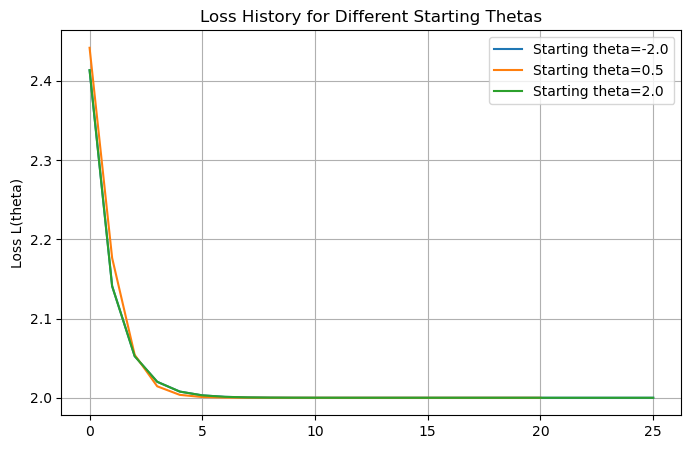

0 len: 27 min: 2.000000000020816 max: 4.00390625 contains NaN: False sample: [4.00390625, 2.4133367429021746, 2.140898102590965, 2.05251851368128, 2.020158641132446]
1 len: 21 min: 2.000000000000863 max: 2.441650390625 contains NaN: False sample: [2.441650390625, 2.1764684037916595, 2.054175551666509, 2.0144705994647287, 2.0036832689556503]
2 len: 27 min: 2.000000000020816 max: 4.00390625 contains NaN: False sample: [4.00390625, 2.4133367429021746, 2.140898102590965, 2.05251851368128, 2.020158641132446]


In [16]:
plt.figure(figsize=(8, 5))
for i, loss_history in enumerate(loss_histories):
    # array con solo i valori in [-3, 3]
    filter_loss_in_range = [loss for loss in loss_histories[i] if -3 <= loss <= 3]
    plt.plot(filter_loss_in_range, label=f'Starting theta={starting_thetas[i]}')
    plt.ylabel('Loss L(theta)')
    plt.title('Loss History for Different Starting Thetas')
    plt.legend()
    plt.grid()

plt.show()

# Starting theta 2 and -2 have the same loss history because of symmetry

for i, hist in enumerate(loss_histories):
    print(i, "len:", len(hist),
          "min:", np.nanmin(hist) if len(hist)>0 else None,
          "max:", np.nanmax(hist) if len(hist)>0 else None,
          "contains NaN:", np.isnan(hist).any() if len(hist)>0 else None,
          "sample:", hist[:5])

- Why different initializations converge to different minima.
- How backtracking automatically chooses a suitable step size at each iteration.
- Situations where constant step size would fail.

# Exercise 3: GD in 2D

In [17]:
A = np.array([[1.0, 0.0],
              [0.0, 25.0]])

def l(theta):
    return 1/2 * theta @ A @ theta.T 



How the gradient is computed:
$$    L(x)= \tfrac{1}{2}  x^{\top} A x        $$
$$x=\begin{pmatrix}x_1\\x_2\end{pmatrix},\qquad A=\begin{pmatrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{pmatrix}$$
$$L(x)=\tfrac{1}{2}\left(a_{11}x_1^2 + (a_{12}+a_{21})x_1x_2 + a_{22}x_2^2\right).$$

Siccome A è una matrice Simmetrica:
$$a_{12} = a_{21} $$
$$L(x)=\tfrac{1}{2}\left(a_{11}x_1^2 + 2a_{12}x_1x_2 + a_{22}x_2^2\right).$$
$$L(x)=\tfrac{1}{2}a_{11}x_1^2 + a_{12}x_1x_2 + \tfrac{1}{2}a_{22}x_2^2.$$

Derivata parziale di x_1 
$$\frac{\partial L}{\partial x_1} = \tfrac{1}{2}2a_{11}x_1 + a_{12}x_2 + 0 $$
$$\frac{\partial L}{\partial x_1} = a_{11}x_1 + a_{12}x_2$$

Derivata parziale di x_2
$$\frac{\partial L}{\partial x_1} = 0 + a_{12}x_1 + \tfrac{1}{2}2a_{22}x_2  $$
$$\frac{\partial L}{\partial x_2} = a_{21}x_1 + a_{22}x_2$$

Inseriamo le derivate parziali come Righe:
$$ ∇L(x)= \begin{pmatrix} a_{11}x_1 & a_{12}x_2 \\a_{21}x_1 & a_{22}x_2\end{pmatrix} $$
$$ ∇L(x)= \begin{pmatrix} a_{11} & a_{12} \\a_{21} & a_{22}\end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$$

In [18]:
def grad_l(theta):
    return A @ theta

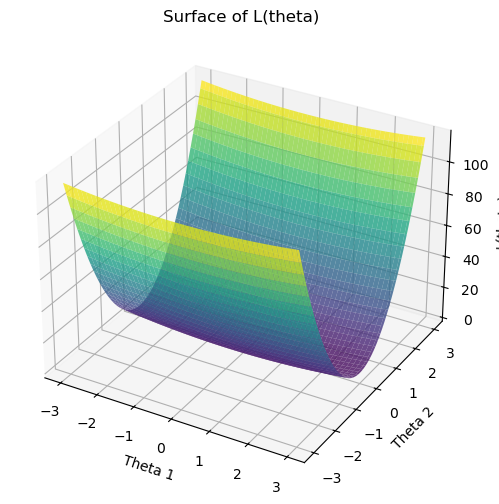

In [19]:
theta1_vals = np.linspace(-3, 3, 100)
theta2_vals = np.linspace(-3, 3, 100)
Theta1, Theta2 = np.meshgrid(theta1_vals, theta2_vals)
L_vals = 0.5 * (A[0,0]*Theta1**2 + A[1,1]*Theta2**2)

# Plot tree-dimensional surface of L(theta)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Theta1, Theta2, L_vals, cmap='viridis', alpha=0.8)
ax.set_xlabel('Theta 1')
ax.set_ylabel('Theta 2')
ax.set_zlabel('L(theta)')
ax.set_title('Surface of L(theta)')
plt.show()

In [20]:
theta_0 = np.array([1.0, 1.0])

maxit = 100
tolL = 1e-6
tolTheta = 1e-6
etas = np.array([0.02, 0.05, 0.1])

loss_histories = []
theta_histories = []

for eta in etas:
    theta_0 = np.array([1.0, 1.0])
    theta_opt, num_iter, loss_history, theta_history = GD(l, grad_l, theta_0, maxit, eta, tolL, tolTheta)
    loss_histories.append(loss_history)
    theta_histories.append(theta_history)
    print(f"Eta: {eta} => Optimal theta: {theta_opt}, iterations: {num_iter}, L(theta_opt): {l(theta_opt)}")

Eta: 0.02 => Optimal theta: [1.32619556e-01 7.88860905e-31], iterations: 99, L(theta_opt): 0.008793973302860778
Eta: 0.05 => Optimal theta: [5.92052922e-03 6.22301528e-61], iterations: 99, L(theta_opt): 1.752633312441451e-05
Eta: 0.1 => Optimal theta: [2.65613989e-05 4.06561178e+17], iterations: 99, L(theta_opt): 2.0661498884852898e+36


In [21]:
def quad_levelsets(A, xlim=(-3,3), ylim=(-3,3), ngrid=400, 
                   ncontours=12, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = 0.5*(A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2)  # theta^T A theta, left-multiplied convention
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.grid(alpha=0.2)

    # ensure axis bounds are set so subsequent plotting is clipped to these limits
    plt.xlim(xlim)
    plt.ylim(ylim)

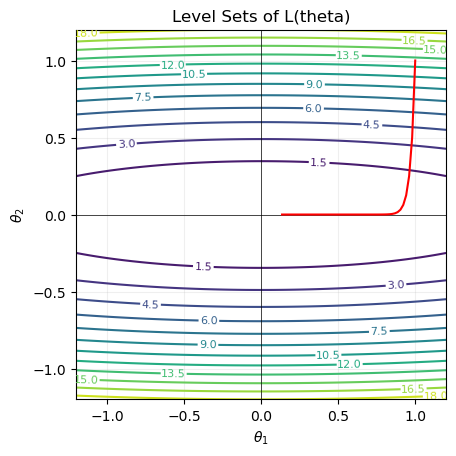

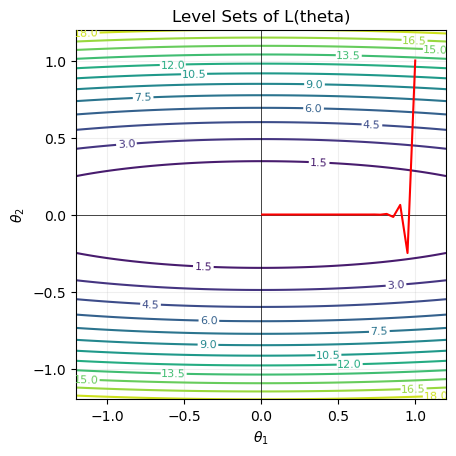

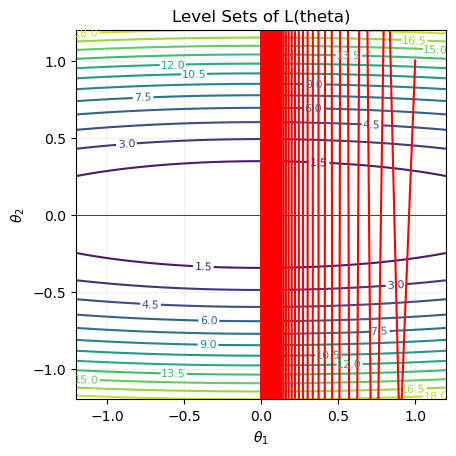

In [22]:
for theta_history in theta_histories:
    x = np.array(theta_history)
    quad_levelsets(A, xlim=(-1.2,1.2), ylim=(-1.2,1.2), title='Level Sets of L(theta)')
    plt.plot(x[:,0], x[:,1], color='red')
    plt.show()

# Es 4 Exact Line Search vs Backtracking

##  Ricerca Lineare Esatta (Exact Line Search)

Quando un algoritmo di ottimizzazione (ad esempio, la Discesa del Gradiente) si trova in un punto $\theta_k$ e ha calcolato una direzione di discesa $d_k$ (ad esempio, $d_k = -\nabla L(\theta_k)$), lo scopo della **Line Search** è risolvere il problema di ottimizzazione in una dimensione:

$$\eta^* = \arg \min_{\eta > 0} L(\theta_k + \eta d_k)$$

L'obiettivo è trovare il valore di $\eta^*$ (il passo) che porta al **minimo assoluto** della funzione di perdita $L$ lungo la linea definita dalla direzione $d_k$ che parte da $\theta_k$.

###  Aspetto Teorico e Calcolo

Il problema $L(\theta_k + \eta d_k)$ può essere visto come una nuova funzione di una sola variabile, $\phi(\eta)$:

$$\phi(\eta) = L(\theta_k + \eta d_k)$$

Per trovare il minimo $\eta^*$, si applica il calcolo differenziale:

1.  **Si calcola la derivata** di $\phi(\eta)$ rispetto a $\eta$. Utilizzando la regola della catena, la derivata è:
    $$\frac{d\phi}{d\eta}(\eta) = \nabla L(\theta_k + \eta d_k)^T d_k$$

2.  **Si imposta la derivata a zero** per trovare i punti stazionari:
    $$\nabla L(\theta_k + \eta d_k)^T d_k = 0$$

L'equazione $g_{k+1}^T d_k = 0$ significa che il gradiente nel nuovo punto $\theta_{k+1} = \theta_k + \eta d_k$ è **ortogonale** (perpendicolare) alla direzione di ricerca $d_k$.

la **Ricerca Lineare Esatta (Exact Line Search)** richiede che il gradiente nel nuovo punto $\theta_{k+1}$ sia ortogonale alla direzione di ricerca $d_k$:

$$\nabla L(\theta_{k+1})^T d_k = 0$$

Nella Discesa del Gradiente (GD), la direzione di ricerca $d_k$ è l'opposto del gradiente, quindi $d_k = -g_k$.

## Come si Calcola Effettivamente $\eta$ (Metodi Numerici)
Nella pratica, l'equazione $\nabla L(\theta_{k} + \eta d_k)^T d_k = 0$ è quasi sempre un'equazione non lineare in $\eta$. Poiché non è possibile risolverla analiticamente (con carta e penna) per la maggior parte delle funzioni di perdita complesse (come quelle delle reti neurali), si ricorre a metodi di ricerca numerica unidimensionale. è molto costoso a livello computazionale perchè va fatta un ciclo iterativo per ogni step di discesa.
$$\eta_{j+1} = \eta_j - \frac{\phi'(\eta_j)}{\phi''(\eta_j)}$$



## Perchè in questo esercizio riusciamo a calolare eta senza cicli

### Passo A: Sostituire il Gradiente

Innanzitutto, calcoliamo il gradiente di $L(\theta)$. Per una forma quadratica $L(\theta)=\frac{1}{2}\theta^T A\theta$, il gradiente è semplicemente:

$$\nabla L(\theta) = A\theta$$

Quindi, il gradiente nel nuovo punto $\theta_{k+1} = \theta_k + \eta_k d_k$ è:

$$\nabla L(\theta_{k+1}) = A\theta_{k+1} = A(\theta_k + \eta_k d_k)$$

### Passo B: Applicare la Condizione di Ortogonalità

Ora sostituiamo questa espressione e $d_k = -g_k$ nell'equazione di ortogonalità:

$$(A(\theta_k + \eta_k d_k))^T d_k = 0$$

Svolgiamo il prodotto scalare:

$$(A\theta_k)^T d_k + \eta_k (Ad_k)^T d_k = 0$$

### Passo C: Usare $g_k$ e Isoliamo $\eta_k^{\ast}$

Ricordiamo che:

* Il gradiente corrente è $g_k = A\theta_k$.
* La direzione di discesa è $d_k = -g_k$.

Sostituendo $A\theta_k = g_k$ e $d_k = -g_k$:

$$(g_k)^T (-g_k) + \eta_k (A(-g_k))^T (-g_k) = 0$$

Semplifichiamo (tenendo presente che $g_k^T g_k = \|g_k\|^2$):

$$-g_k^T g_k + \eta_k ((-Ag_k)^T (-g_k)) = 0$$

Poiché $(-Ag_k)^T (-g_k) = (Ag_k)^T g_k$ (il meno si annulla):

$$-g_k^T g_k + \eta_k (Ag_k)^T g_k = 0$$

Riorganizziamo per isolare $\eta_k^{\ast}$:

$$\eta_k^{\ast}(g_k^T A g_k) = g_k^T g_k$$

Infine, troviamo la formula analitica per $\eta_k^{\ast}$:

$$\eta_k^{\ast} = \frac{g_k^T g_k}{g_k^T A g_k}$$

In [23]:
A = np.array([[5.0, 0.0],
              [0.0, 2.0]])

def l(theta):
    return 1/2 * theta @ A @ theta.T

def grad_l(theta):
    return A @ theta

In [24]:
def GD_exact_line_search(l, grad_l, theta_0, maxit, tolL, tolTheta):
    loss_history = []
    theta_history = []

    for k in range(maxit):
        g = grad_l(theta_0)
        # exact line search step size
        eta = (g @ g) / (g @ A @ g)

        theta = theta_0 - eta * g

        if(np.linalg.norm(grad_l(theta))<tolL or (np.linalg.norm(theta-theta_0)<tolTheta)):
            break

        loss_history.append(l(theta))
        theta_history.append(theta_0)

        theta_0 = theta
    return theta, k, loss_history, theta_history

In [25]:
def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)

    # se:   Loss_k+1 > Loss_k - Armijo_constante * eta * norma_2_gradiente
    # allora riduci eta
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

def GD_backtracking(l, grad_l, theta_0, maxit, tolL, tolTheta, eta0=1.0):
    loss_history = []
    theta_history = []

    # GD step
    for k in range(maxit):
        # compute step size via backtracking 
        eta = backtracking(l, grad_l, theta_0, eta0=eta0)
        
        theta = theta_0 - eta * grad_l(theta_0)

        if(np.linalg.norm(grad_l(theta))<tolL or (np.linalg.norm(theta-theta_0)<tolTheta)):
            break

        loss_history.append(l(theta))
        theta_history.append(theta_0)

        theta_0 = theta
    return theta, k, loss_history, theta_history

In [26]:
theta_0 = np.array([3.0, 3.0])

maxit = 100
tolL = 1e-6
tolTheta = 1e-6

theta_opt_1, num_iter_1, loss_history_1, theta_history_1 = GD_exact_line_search(l, grad_l, theta_0.copy(), maxit, tolL, tolTheta)
theta_opt_2, num_iter_2, loss_history_2, theta_history_2 = GD_backtracking(l, grad_l, theta_0.copy(), maxit, tolL, tolTheta)

print("Exact Line Search: Optimal theta:", theta_opt_1, " iterations:" , num_iter_1,  "Loss: ", l(theta_opt_1))
print("Backtracking: Optimal theta:", theta_opt_2, " iterations:" , num_iter_2, "Loss: ", l(theta_opt_2))

Exact Line Search: Optimal theta: [-2.13550533e-08  1.33469083e-07]  iterations: 14 Loss:  1.8954091841682185e-14
Backtracking: Optimal theta: [6.70552254e-08 0.00000000e+00]  iterations: 13 Loss:  1.124100812432971e-14


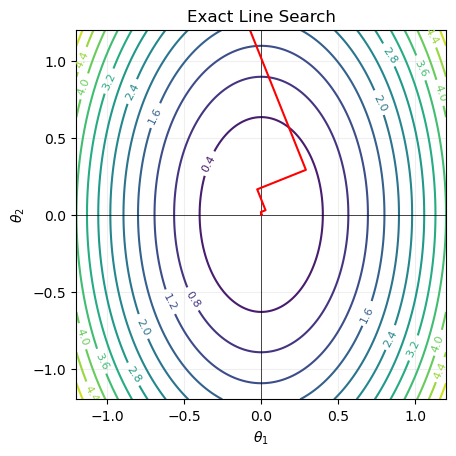

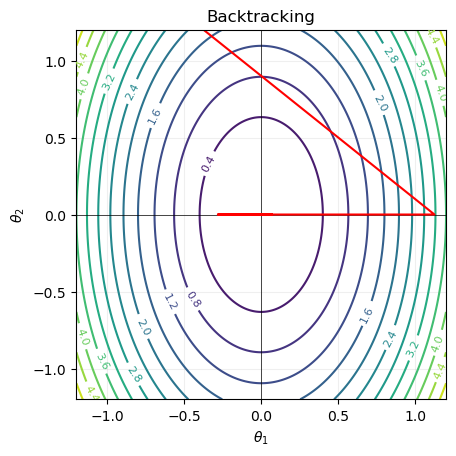

In [27]:
x = np.array(theta_history_1)
quad_levelsets(A, xlim=(-1.2,1.2), ylim=(-1.2,1.2), title='Exact Line Search')
plt.plot(x[:,0], x[:,1], color='red')
plt.show()

x = np.array(theta_history_2)
quad_levelsets(A, xlim=(-1.2,1.2), ylim=(-1.2,1.2), title='Backtracking')
plt.plot(x[:,0], x[:,1], color='red')
plt.show()

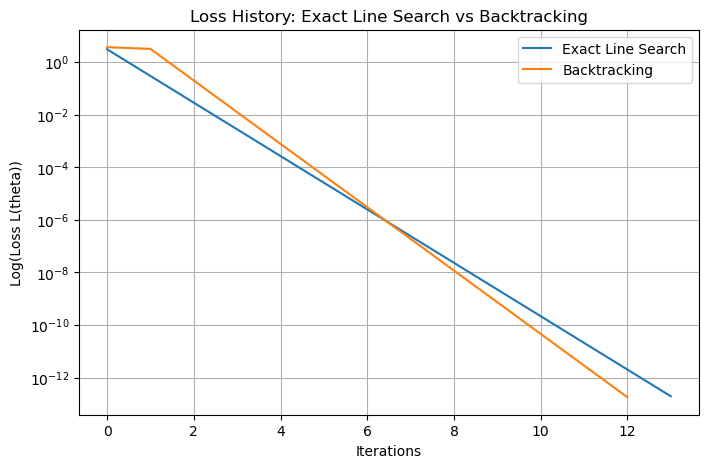

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(loss_history_1, label='Exact Line Search')
plt.plot(loss_history_2, label='Backtracking')
plt.legend()
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Log(Loss L(theta))')
plt.title('Loss History: Exact Line Search vs Backtracking')
plt.grid()
plt.show()

# Exercise 5: Gradient Descent on the Rosenbrock Function

In [37]:
# The 2-dimensional Rosenbrock function is defined as:
def rosenbrock(theta):
    return (1 - theta[0])**2 + 100 * (theta[1] - theta[0]**2)**2

def grad_rosenbrock(theta):
    dL_dtheta1 = -2 * (1 - theta[0]) - 400 * theta[0] * (theta[1] - theta[0]**2)
    dL_dtheta2 = 200 * (theta[1] - theta[0]**2)
    return np.array([dL_dtheta1, dL_dtheta2])

# Initial thetas
Initial_thetas = np.array([
    [-1.5, 2.0],
    [-1.0, 0.0],
    [0, 2],
    [1.5, 1.5]
])

etas = [0.001, 0.0001, 0.00001]


configuratitons = []
for theta_0 in Initial_thetas:
    for eta in etas :
        configuratitons.append({'eta': eta, 'theta_0': theta_0})

results_classic_gd = []
for configuration in configuratitons:
    maxit = 1000
    tolL = 1e-6
    tolTheta = 1e-6
    eta = configuration['eta']
    theta_0 = configuration['theta_0']
    theta_opt, num_iter, loss_history, theta_history = GD(rosenbrock, grad_rosenbrock, theta_0, maxit, eta, tolL, tolTheta)
    results_classic_gd.append((theta_0, eta, theta_opt, num_iter, rosenbrock(theta_opt), loss_history, theta_history))

print("Results with Classic Gradient Descent:\n")
print(f"{'theta_0':>12} | {'eta':>10} | {'theta_opt':>20} | {'iter':>6} | {'L(theta_opt)':>12}")
for t0, eta, topt, it, loss, _, _ in results_classic_gd:
    print(f"{str(t0):>12} | {eta:10.6f} | {str(np.round(topt,4)):>20} | {it:6d} | {loss:12.6g}")


results_backtracking_gd = []
for theta_0 in Initial_thetas:
    maxit = 1000
    tolL = 1e-6
    tolTheta = 1e-6
    eta0 = 1.0
    theta_opt, num_iter, loss_history, theta_history = GD_backtracking(rosenbrock, grad_rosenbrock, theta_0, maxit, tolL, tolTheta,  eta0=eta0)
    results_backtracking_gd.append((theta_0, theta_opt, num_iter, rosenbrock(theta_opt), loss_history, theta_history))

print("\nResults with Backtracking Line Search:\n")
print(f"{'theta_0':>12} | {'theta_opt':>20} | {'iter':>6} | {'L(theta_opt)':>12}")
for t0, topt, it, loss, _, _ in results_backtracking_gd:
    print(f"{str(t0):>12} | {str(np.round(topt,4)):>20} | {it:6d} | {loss:12.6g}")


Results with Classic Gradient Descent:

     theta_0 |        eta |            theta_opt |   iter | L(theta_opt)
 [-1.5  2. ] |   0.001000 |    [-0.6603  0.444 ] |    999 |      2.76291
 [-1.5  2. ] |   0.000100 |    [-1.3664  1.8748] |    999 |      5.60592
 [-1.5  2. ] |   0.000010 |    [-1.4157  2.0119] |    999 |       5.8415
   [-1.  0.] |   0.001000 |      [0.5979 0.3555] |    999 |      0.16207
   [-1.  0.] |   0.000100 |    [-0.3878  0.1572] |    999 |      1.93063
   [-1.  0.] |   0.000010 |    [-0.5341  0.2866] |    999 |      2.35353
     [0. 2.] |   0.001000 |      [0.6837 0.466 ] |    999 |     0.100266
     [0. 2.] |   0.000100 |      [0.2845 0.0779] |    999 |     0.512907
     [0. 2.] |   0.000010 |      [0.1075 0.2743] |    999 |      7.70163
   [1.5 1.5] |   0.001000 |      [1.1841 1.4026] |    999 |    0.0339181
   [1.5 1.5] |   0.000100 |      [1.2523 1.5691] |    999 |    0.0637268
   [1.5 1.5] |   0.000010 |      [1.2588 1.5855] |    999 |    0.0670533

Results wi

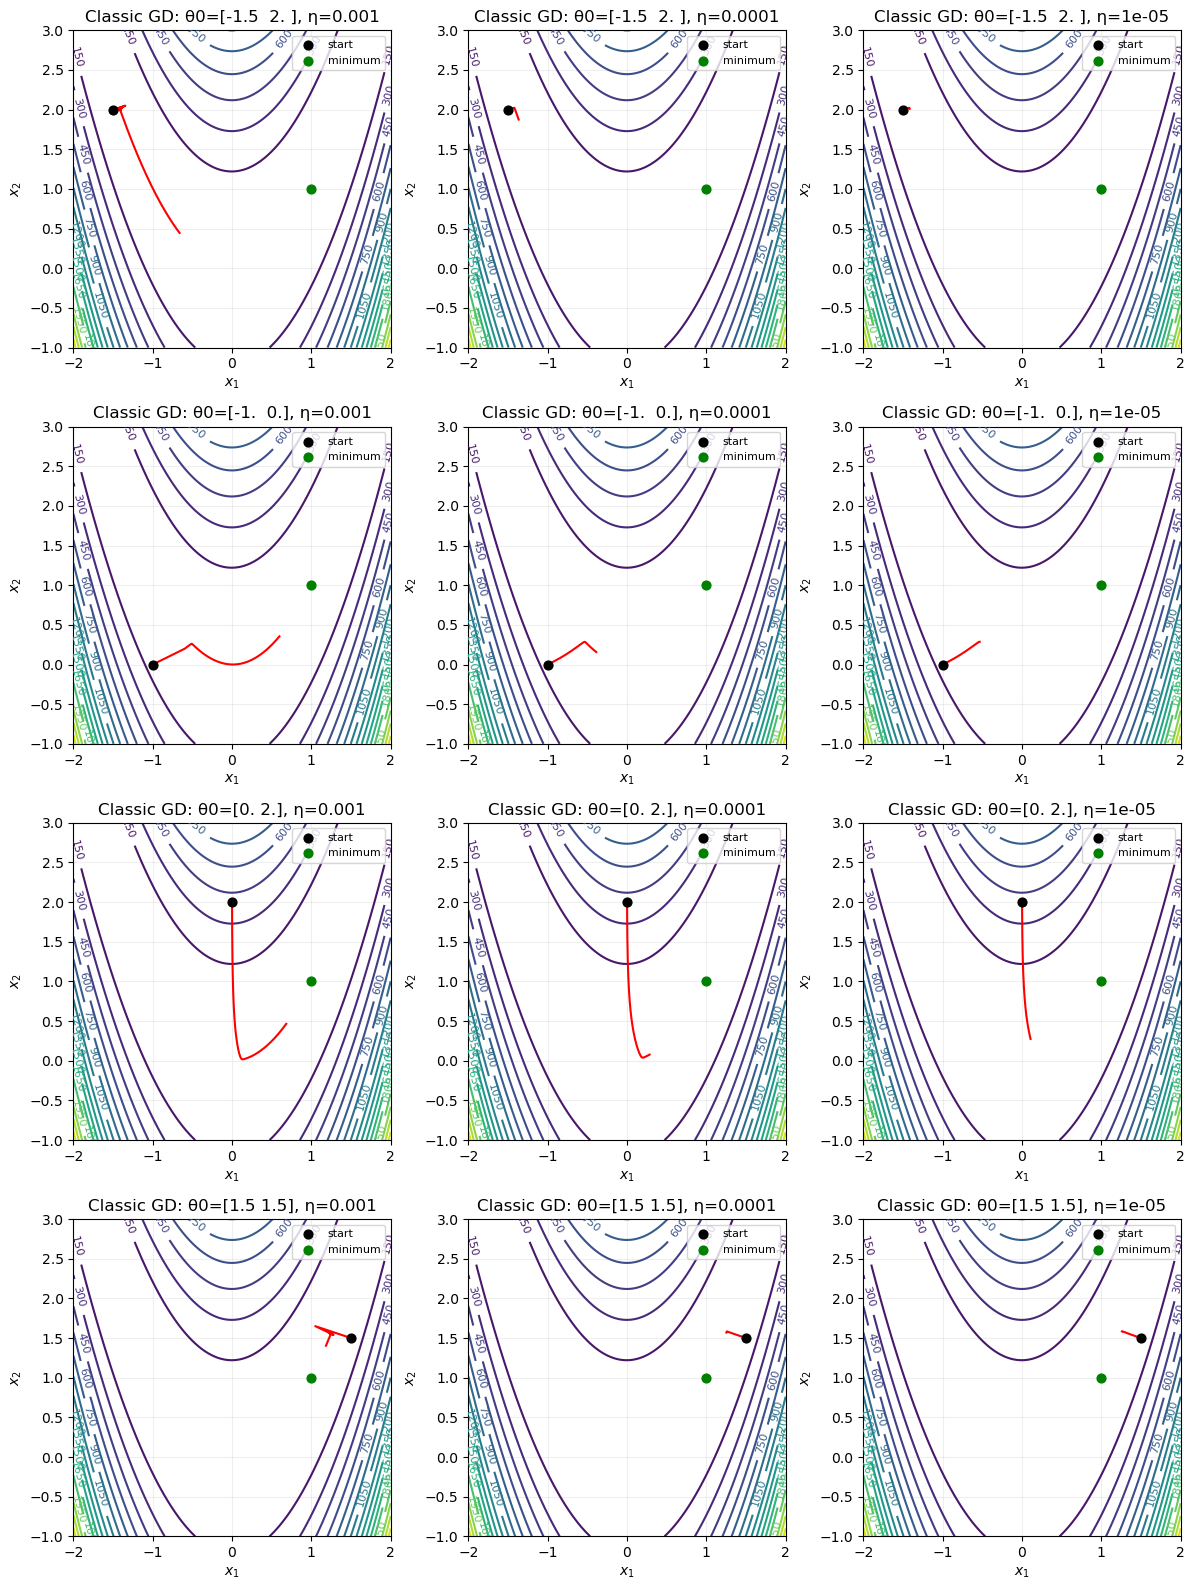

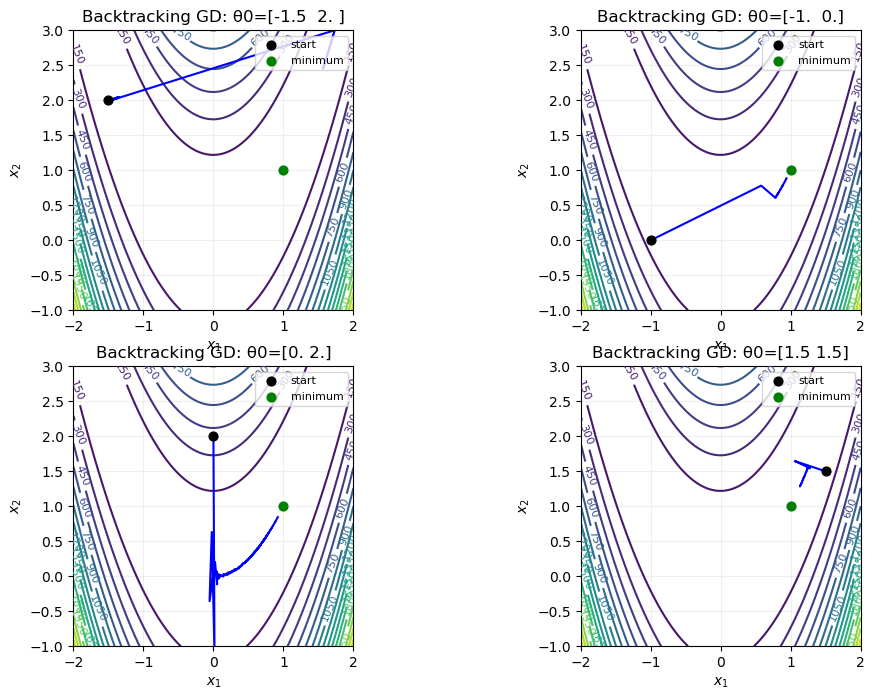

In [46]:
# Plotting level line of Rosenbrock function using 
def rosenbrock_levelsets(xlim=(-2,2), ylim=(-1,3), ngrid=400, ncontours=20, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = (1 - X)**2 + 100 * (Y - X**2)**2
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.grid(alpha=0.2)
    # ensure axis bounds are set so subsequent plotting is clipped to these limits
    plt.xlim(xlim)
    plt.ylim(ylim)

# print the theta history for every configuratiton of classic GD
n_plots = len(configuratitons)
n_cols = 3
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()
for ax, configuration, result_classic_gd in zip(axes, configuratitons, results_classic_gd):
    theta_0 = configuration['theta_0']
    eta = configuration['eta']
    theta_history = result_classic_gd[6] 
    x = np.array(theta_history)
    # draw level sets on the given axis
    xs = np.linspace(-2, 2, 400)
    ys = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(xs, ys)
    Z = (1 - X)**2 + 100 * (Y - X**2)**2
    cs = ax.contour(X, Y, Z, levels=20)
    ax.clabel(cs, inline=True, fontsize=8)
    ax.plot(x[:,0], x[:,1], color='red')
    ax.scatter(theta_0[0], theta_0[1], color='black', s=40, marker='o', zorder=5, label='start')
    ax.scatter(1, 1, color='green', s=40, marker='o', zorder=5, label='minimum')
    ax.legend(loc='upper right', fontsize=8)
    ax.set_title(f'Classic GD: θ0={theta_0}, η={eta}')
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.grid(alpha=0.2)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-1, 3)
# nascondi eventuali assi vuoti
for ax in axes[n_plots:]:
    ax.axis('off')
plt.tight_layout()
plt.show()

# print the theta history for every configuratiton of backtracking GD
n_plots = len(Initial_thetas)
n_cols = 2
n_rows = int(np.ceil(n_plots / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()
for ax, configuration, result_backtracking_gd in zip(axes, Initial_thetas, results_backtracking_gd):
    theta_0 = configuration
    theta_history = result_backtracking_gd[5] 
    x = np.array(theta_history)
    # draw level sets on the given axis
    xs = np.linspace(-2, 2, 400)
    ys = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(xs, ys)
    Z = (1 - X)**2 + 100 * (Y - X**2)**2
    cs = ax.contour(X, Y, Z, levels=20)
    ax.clabel(cs, inline=True, fontsize=8)
    ax.plot(x[:,0], x[:,1], color='blue')
    ax.scatter(theta_0[0], theta_0[1], color='black', s=40, marker='o', zorder=5, label='start')
    ax.scatter(1, 1, color='green', s=40, marker='o', zorder=5, label='minimum')
    ax.legend(loc='upper right', fontsize=8)
    ax.set_title(f'Backtracking GD: θ0={theta_0}')
    ax.set_xlabel(r'$x_1$')
    ax.set_ylabel(r'$x_2$')
    ax.grid(alpha=0.2)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-1, 3)
